A charged line segment of which the length is $2L$. It lay along the z-axis, and its mid point is at the origin. The charge is uniformly distributed, and the charge density is $\tau$.

In [2]:
import vpython as vp
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.abc import *
from math import pi as PI

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
e_x = vp.arrow(shaftwidth=0.05, color=vp.vec(1,0,0), visible=True)
e_x.pos = vp.vec(0,0,0)
e_x.axis = vp.vec(1,0,0)
text_x = vp.text(text='x', pos=e_x.axis, height=0.1, color=e_x.color, billboard=True, emissive=True)

e_y = vp.arrow(shaftwidth=0.05, color=vp.vec(0,1,0), visible=True)
e_y.pos = vp.vec(0,0,0)
e_y.axis = vp.vec(0,1,0)
text_y = vp.text(text='y', pos=e_y.axis, height=0.1, color=e_y.color, billboard=True, emissive=True)

e_z = vp.arrow(shaftwidth=0.05, color=vp.vec(0,0,1), visible=True)
e_z.pos = vp.vec(0,0,0)
e_z.axis = vp.vec(0,0,1)
text_z = vp.text(text='z', pos=e_z.axis, height=0.1, color=e_z.color, billboard=True, emissive=True)

linelen = 3 #2L
lineseg = vp.cylinder(
    pos=vp.vec(0,0,-linelen/2),
    axis=vp.vec(0,0,linelen),
    radius=0.02,
    color=vp.color.yellow)
text_posL = vp.text(text='L', pos=vp.vec(0,0,linelen/2), height=0.1, color=vp.color.yellow, billboard=True, emissive=True)
text_negL = vp.text(text='-L', pos=vp.vec(0,0,-linelen/2), height=0.1, color=vp.color.yellow, billboard=True, emissive=True)

Select a point $p:(r_p, \alpha_p, z_p)$, and the static electric field generated by a infinitesimal located at $(0, 0, z)$ can be written as:
$$d\vec{E}=\frac{\tau dz}{4\pi\epsilon_0(r_p^2+(z_p-z)^2)^{3/2}}(r_p\vec{e}_r+(z_p-z)\vec{e}_z)$$.

The complete form of the field generated by the line segment can be calculated by:
$$\vec{E} = E_r\vec{e}_r + E_z\vec{e}_z$$

$$E_r = \frac{\tau}{4\pi\epsilon_0} \int_{-L}^L \frac{r_p}{(r_p^2+(z_p-z)^2)^{3/2}}dz$$

$$E_z = \frac{\tau}{4\pi\epsilon_0} \int_{-L}^L \frac{z_p-z}{(r_p^2+(z_p-z)^2)^{3/2}}dz$$

In [3]:
var('r_p, z_p, tau, pi, epsilon_0')

(rₚ, zₚ, τ, π, ε₀)

In [4]:
tau/(4*pi*epsilon_0)*integrate(r_p/sqrt(r_p**2+(z_p-z)**2)**3, (z, -L, L))

  ⎛          L - zₚ                     -L - zₚ          ⎞
τ⋅⎜───────────────────────── - ──────────────────────────⎟
  ⎜          _______________             ________________⎟
  ⎜         ╱             2             ╱              2 ⎟
  ⎜  2     ╱      (L - zₚ)       2     ╱      (-L - zₚ)  ⎟
  ⎜rₚ ⋅   ╱   1 + ─────────    rₚ ⋅   ╱   1 + ────────── ⎟
  ⎜      ╱             2             ╱             2     ⎟
  ⎝    ╲╱            rₚ            ╲╱            rₚ      ⎠
──────────────────────────────────────────────────────────
                          4⋅ε₀⋅π                          

We can also solve this problem using electric potential $\phi(r, \alpha, z)$. The potential of a point charge $q$ is given by:
$$\phi = \frac{\tau}{4\pi\epsilon_0R}.$$

The potential of the line segment can be calculated as:
$$\phi(r, \alpha, z) = \frac{\tau}{4\pi\epsilon_0}\int_{-L}^L \frac{dz}{R}
= \frac{\tau}{4\pi\epsilon_0} \int_{-L}^L \frac{dz}{\sqrt{r_p^2 + (z_p-z)^2}}.$$

In [5]:
phi = tau/(4*pi*epsilon_0)*integrate(1/sqrt(r_p**2+(z-z_p)**2), (z, -L, L))
phi

  ⎛       ⎛-L - zₚ⎞        ⎛L - zₚ⎞⎞
τ⋅⎜- asinh⎜───────⎟ + asinh⎜──────⎟⎟
  ⎝       ⎝   rₚ  ⎠        ⎝  rₚ  ⎠⎠
────────────────────────────────────
               4⋅ε₀⋅π               

Hence, the potential has the following expression:
$$\phi(r, \alpha, z) = \frac{\tau}{4\pi\epsilon_0} \left(\mathrm{asinh}\left(
    \frac{1}{r}\left(L-z\right)
\right) - \mathrm{asinh}\left(
    \frac{1}{r}\left(-L-z\right)
\right)\right).$$

Let
$$\frac{q}{4\pi\epsilon_0} = 1,$$
$$L = 1.$$
The image of the potential is shown as follows:

In [6]:
r_samp = np.linspace(-2, 2, 128)
z_samp = np.linspace(-2, 2, 128)

R_samp, Z_samp = np.meshgrid(r_samp, z_samp)
Phi_samp = np.arcsinh((1-Z_samp)/np.abs(R_samp)) - np.arcsinh((-1-Z_samp)/np.abs(R_samp))

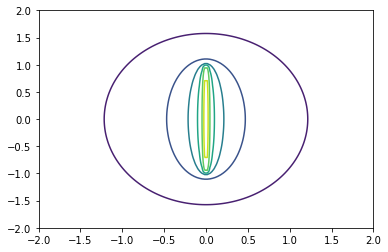

In [8]:
plt.contour(r_samp, z_samp, Phi_samp, vmin=Phi_samp.min(), vmax=Phi_samp.max())
plt.show()

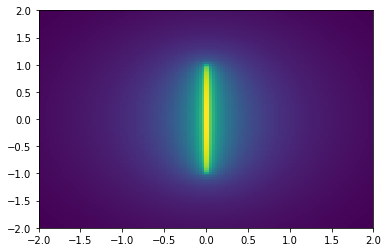

In [9]:
plt.pcolor(r_samp, z_samp, Phi_samp, vmin=Phi_samp.min(), vmax=Phi_samp.max())
plt.show()

According to the formula of gradient on cylindrical coordinate system, we can calculate the electric field vector:

In [10]:
-diff(phi, r_p)

   ⎛            L - zₚ                     -L - zₚ          ⎞ 
-τ⋅⎜- ───────────────────────── + ──────────────────────────⎟ 
   ⎜            _______________             ________________⎟ 
   ⎜           ╱             2             ╱              2 ⎟ 
   ⎜    2     ╱      (L - zₚ)       2     ╱      (-L - zₚ)  ⎟ 
   ⎜  rₚ ⋅   ╱   1 + ─────────    rₚ ⋅   ╱   1 + ────────── ⎟ 
   ⎜        ╱             2             ╱             2     ⎟ 
   ⎝      ╲╱            rₚ            ╲╱            rₚ      ⎠ 
──────────────────────────────────────────────────────────────
                            4⋅ε₀⋅π                            

In [11]:
-diff(phi, z_p)

   ⎛             1                           1            ⎞ 
-τ⋅⎜- ──────────────────────── + ─────────────────────────⎟ 
   ⎜           _______________            ________________⎟ 
   ⎜          ╱             2            ╱              2 ⎟ 
   ⎜         ╱      (L - zₚ)            ╱      (-L - zₚ)  ⎟ 
   ⎜  rₚ⋅   ╱   1 + ─────────    rₚ⋅   ╱   1 + ────────── ⎟ 
   ⎜       ╱             2            ╱             2     ⎟ 
   ⎝     ╲╱            rₚ           ╲╱            rₚ      ⎠ 
────────────────────────────────────────────────────────────
                           4⋅ε₀⋅π                           

     ⎛                                                                       3
     ⎜        2⋅(L - zₚ)                 2⋅(-L - zₚ)                 (L - zₚ) 
rₚ⋅τ⋅⎜───────────────────────── - ────────────────────────── - ───────────────
     ⎜          _______________             ________________                  
     ⎜         ╱             2             ╱              2        ⎛          
     ⎜  3     ╱      (L - zₚ)       3     ╱      (-L - zₚ)       5 ⎜    (L - z
     ⎜rₚ ⋅   ╱   1 + ─────────    rₚ ⋅   ╱   1 + ──────────    rₚ ⋅⎜1 + ──────
     ⎜      ╱             2             ╱             2            ⎜         2
     ⎝    ╲╱            rₚ            ╲╱            rₚ             ⎝       rₚ 
──────────────────────────────────────────────────────────────────────────────
                                                     4⋅ε₀⋅π                   
──────────────────────────────────────────────────────────────────────────────
                                                    